# 1. Data Processing

## 1.1. Read Data

In [1]:
rm(list =ls())
library(MASS)

data = read.csv("BodyFat.csv")
data = data[c(-1,-3)] # Remove indexes and density
head(data)

BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
12.6,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
6.9,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
24.6,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
10.9,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
27.8,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
20.6,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


In [2]:
summary(data)

    BODYFAT           AGE            WEIGHT          HEIGHT     
 Min.   : 0.00   Min.   :22.00   Min.   :118.5   Min.   :29.50  
 1st Qu.:12.80   1st Qu.:35.75   1st Qu.:159.0   1st Qu.:68.25  
 Median :19.00   Median :43.00   Median :176.5   Median :70.00  
 Mean   :18.94   Mean   :44.88   Mean   :178.9   Mean   :70.15  
 3rd Qu.:24.60   3rd Qu.:54.00   3rd Qu.:197.0   3rd Qu.:72.25  
 Max.   :45.10   Max.   :81.00   Max.   :363.1   Max.   :77.75  
   ADIPOSITY          NECK           CHEST           ABDOMEN      
 Min.   :18.10   Min.   :31.10   Min.   : 79.30   Min.   : 69.40  
 1st Qu.:23.10   1st Qu.:36.40   1st Qu.: 94.35   1st Qu.: 84.58  
 Median :25.05   Median :38.00   Median : 99.65   Median : 90.95  
 Mean   :25.44   Mean   :37.99   Mean   :100.82   Mean   : 92.56  
 3rd Qu.:27.32   3rd Qu.:39.42   3rd Qu.:105.38   3rd Qu.: 99.33  
 Max.   :48.90   Max.   :51.20   Max.   :136.20   Max.   :148.10  
      HIP            THIGH            KNEE           ANKLE          BICEPS  

In [3]:
RMIndex = which(data[,1]==0 | data[,3]==max(data[,3]) | data[,4]==min(data[,4]) | data[,6]==max(data[,6]) | data[,7]>125 | 
                data[,8]==max(data[,8]) | data[,9]>120 | data[,10]==max(data[,10]) | data[,11]==max(data[,11]) | 
                data[,11]==max(data[,11]) | data[,12]>29 | data[,13]==max(data[,13]))

In [4]:
data[RMIndex,]

,BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
31,12.3,32,182.00,73.75,23.6,38.7,100.5,88.7,99.8,57.5,38.7,33.9,32.5,27.7,18.4
39,33.8,46,363.15,72.25,48.9,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
41,33.1,45,262.75,68.75,39.1,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4
42,31.7,44,205.00,29.50,29.9,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4
86,25.8,67,167.00,67.50,26.0,36.5,98.9,89.7,96.2,54.7,37.8,33.7,32.4,27.7,18.2
182,0.0,40,118.50,68.00,18.1,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5


In [5]:
data[42, ]

,BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
42,31.7,44,205,29.5,29.9,36.6,106,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4


In [6]:
# 1kg = 0.4535922921969lbs
# test 
weight1 <- 154.25 * 0.4535922921969
height1 <- 67.75 * 0.0254
bmi <- weight1 / height1^2

weight42 <- 205 * 0.4535922921969
height42 <- sqrt(weight42 / 29.9) 
data[42, 4] <- height42 / 0.0254 
data[42, 4]

[1] 69.42893

In [7]:
set <- c(31, 39, 41, 86, 182) 
#data <- data[-set, ]
RMIndex = c(set,216)
RMIndex

[1]  31  39  41  86 182 216

In [8]:
dim(data)

[1] 252  15

In [9]:
colnames(data)

[1] "BODYFAT"   "AGE"       "WEIGHT"    "HEIGHT"    "ADIPOSITY" "NECK"     
 [7] "CHEST"     "ABDOMEN"   "HIP"       "THIGH"     "KNEE"      "ANKLE"    
[13] "BICEPS"    "FOREARM"   "WRIST"

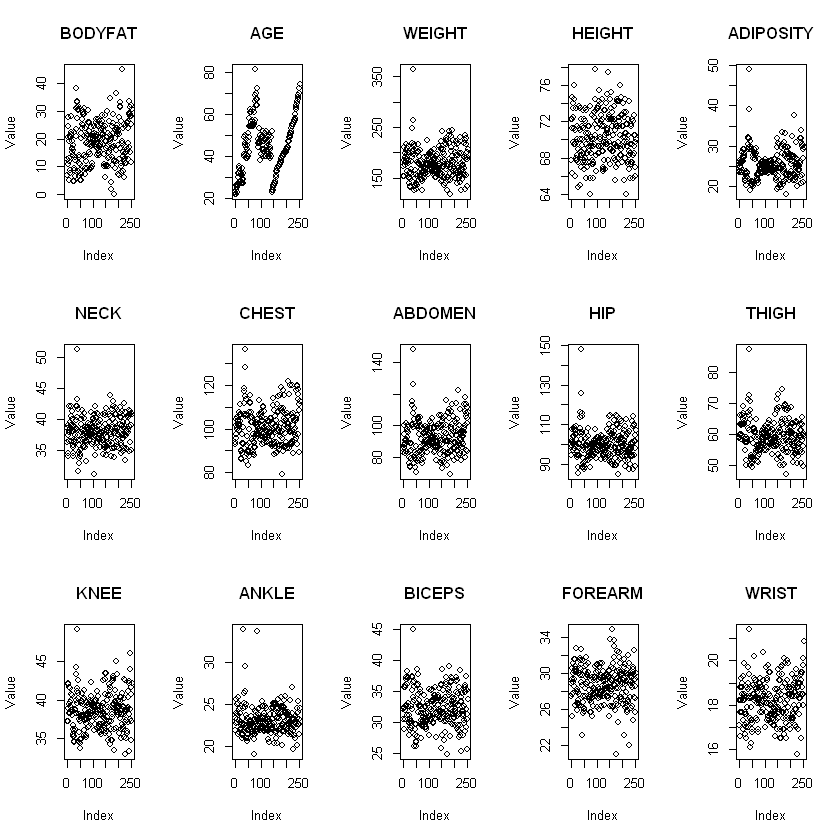

In [10]:
par(mfrow = c(3,5))
for(i in 1:15){
    plot(data[,i], main = colnames(data)[i], ylab = "Value")
}
par(mfrow = c(1,1))

## 1.2. Simple Linear Regression

In [11]:
lm.naive = lm(BODYFAT~., data = data[-RMIndex,])
summary(lm.naive)


Call:
lm(formula = BODYFAT ~ ., data = data[-RMIndex, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6498 -2.8212 -0.0284  2.6360  9.1439 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -16.40562   38.42686  -0.427  0.66983    
AGE           0.06034    0.03022   1.997  0.04703 *  
WEIGHT       -0.06554    0.10712  -0.612  0.54126    
HEIGHT        0.09855    0.53087   0.186  0.85289    
ADIPOSITY     0.48342    0.77624   0.623  0.53405    
NECK         -0.38189    0.21993  -1.736  0.08383 .  
CHEST        -0.12945    0.10449  -1.239  0.21665    
ABDOMEN       0.81526    0.08642   9.434  < 2e-16 ***
HIP          -0.15242    0.13951  -1.093  0.27574    
THIGH         0.18980    0.13895   1.366  0.17327    
KNEE         -0.04911    0.24981  -0.197  0.84432    
ANKLE        -0.06649    0.33893  -0.196  0.84465    
BICEPS        0.11602    0.16134   0.719  0.47278    
FOREARM       0.25556    0.19391   1.318  0.18882    
WRIST        -1.44796  

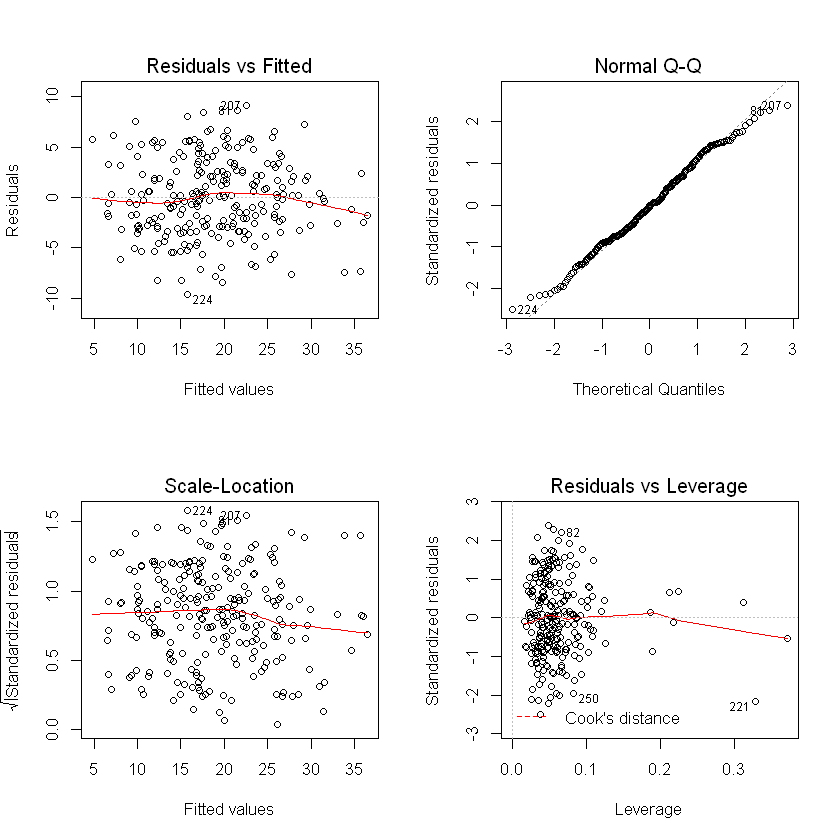

In [12]:
par(mfrow = c(2,2))
plot(lm.naive)
par(mfrow = c(1,1))

## 1.3. Identify Outliers And Strong Influential Points

### 1.3.1. Studentized Residual

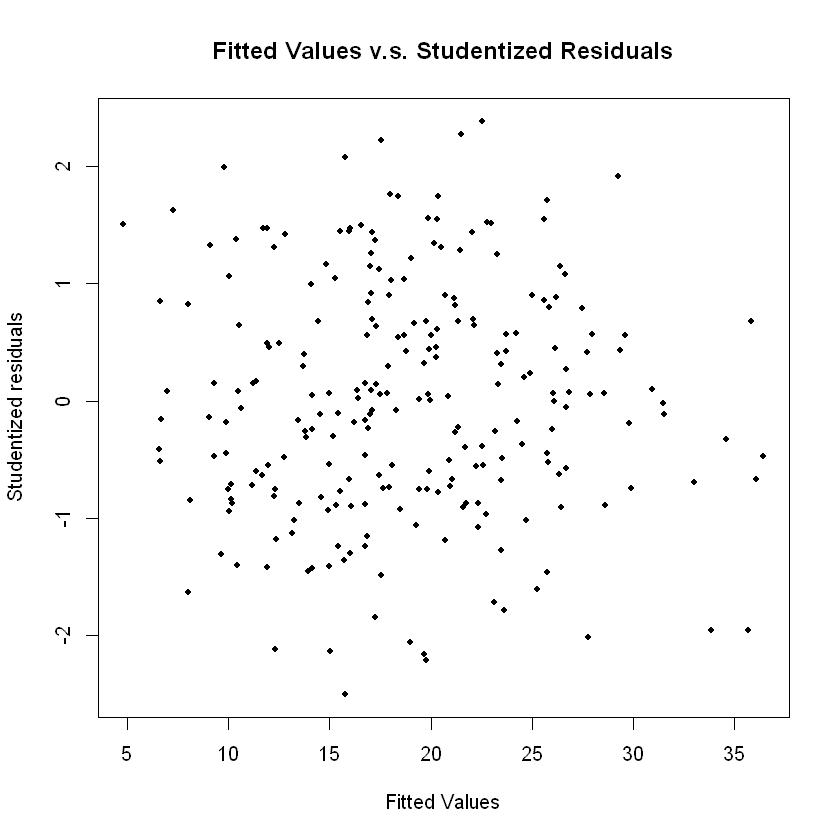

In [13]:
index = 1:dim(data)[1]
lm.stdres = stdres(lm.naive)
plot(x = lm.naive$fitted.values, y = lm.stdres, ylab = "Studentized residuals", xlab = "Fitted Values", 
     main = "Fitted Values v.s. Studentized Residuals", pch = 20)
#text(y = lm.stdres[which(abs(lm.stdres)>3)], x = lm.naive$fitted.values[which(abs(lm.stdres)>3)], 
#     labels = index[which(abs(lm.stdres)>3)], cex = 1, pos = 3)

### 1.3.2. Leverage Value

#### Set index manully

In [21]:
index = 1:252
index = index[-RMIndex]

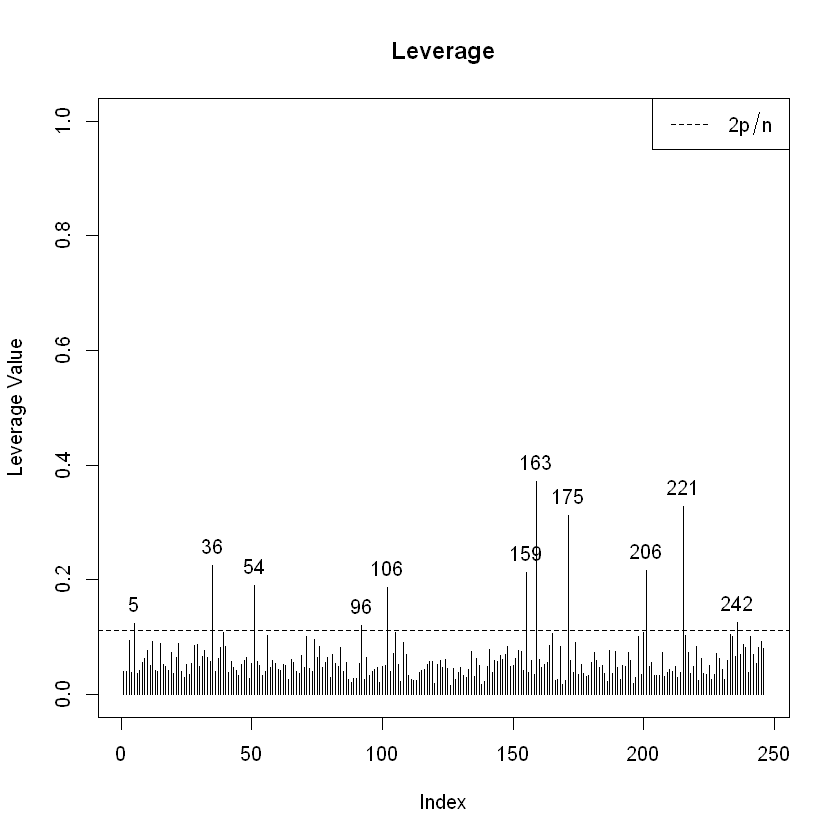

In [15]:
lm.hats=hatvalues(lm.naive)
plot(lm.hats, type = "h", ylim = c(0, 1), ylab = "Leverage Value", main = "Leverage") 
h0 = 28/252 # Rule of thumb for judging outliers
text(y = lm.hats[lm.hats>h0], x = which(lm.hats>h0), labels = index[which(lm.hats>h0)], cex = 1, pos = 3)
abline(h = h0, lty = 2)
legend("topright", legend = expression(2*p/n), lty = 2)

### 1.3.3. DFFITS

In [16]:
#lm.dffits = dffits(lm.naive)
#dffit_index = as.numeric(names(lm.dffits))
#dffit_index

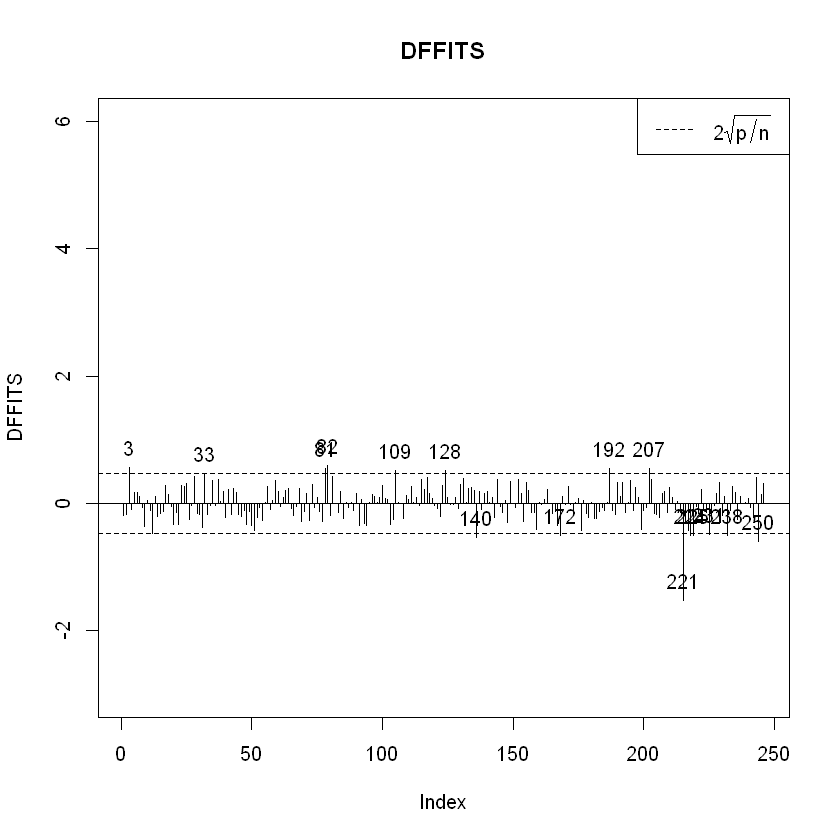

In [17]:
lm.dffits = dffits(lm.naive)
plot(lm.dffits, type = "h", ylim = c(-3, 6), ylab = "DFFITS", main = "DFFITS")
d0 = 2*sqrt(14/252) # Rule of thumb for judging influential points
text(y = lm.dffits[abs(lm.dffits)>d0], x = which(abs(lm.dffits)>d0), labels = index[which(abs(lm.dffits)>d0)], cex = 1, pos = 3)
abline(h = c(-1*d0, 0, d0), lty = c(2,1,2))
legend("topright", legend = expression(2*sqrt(p/n)), lty = 2)

### 1.3.4. Cook's Distance

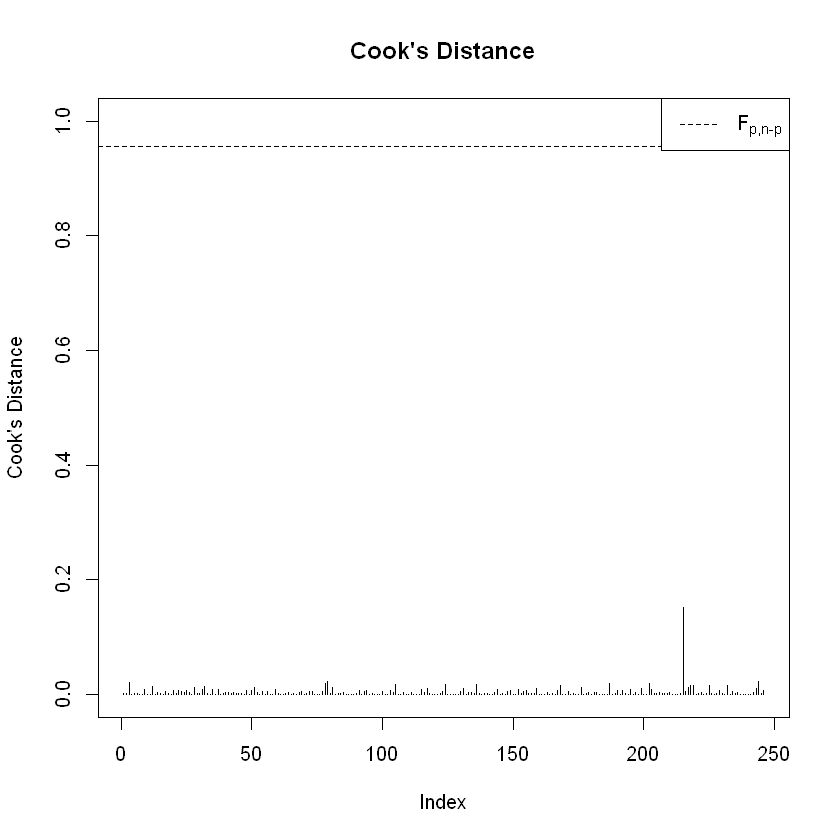

In [18]:
lm.cooksD=cooks.distance(lm.naive)
plot(lm.cooksD, type = "h", ylim = c(0, 1), ylab = "Cook's Distance", main = "Cook's Distance")
c0 = qf(0.5, 14, 238)
#text(y = lm.cooksD[lm.cooksD>c0], x = which(lm.cooksD>c0), labels = index[which(lm.cooksD>c0)], cex = 1, pos = 3)
abline(h = c0, lty = 2)
legend("topright", legend = expression(F[paste("p,n-p", sep="")]), lty = 2)

In [19]:
data[index[which(lm.hats>h0 & abs(lm.dffits)>d0)],]

,BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
221,12.7,54,153.25,70.5,24.5,38.5,99,91.8,96.2,57.7,38.1,23.9,31.4,29.9,18.9


These Points have both large leverage value and DFFITS.

In [78]:
biggest = formula(lm(BODYFAT~., data[-RMIndex,]))
biggest

BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

In [80]:
step(lm(BODYFAT~1, data = data[-RMIndex,]), direction = "both", scope = biggest)

Start:  AIC=987.58
BODYFAT ~ 1

            Df Sum of Sq     RSS    AIC
+ ABDOMEN    1    8991.7  4526.3 720.43
+ ADIPOSITY  1    7186.6  6331.4 802.99
+ CHEST      1    6291.1  7226.8 835.54
+ HIP        1    5210.0  8307.9 869.83
+ WEIGHT     1    4943.9  8574.1 877.59
+ THIGH      1    4046.0  9472.0 902.09
+ KNEE       1    3554.9  9963.0 914.52
+ BICEPS     1    2995.3 10522.7 927.96
+ NECK       1    2898.7 10619.2 930.21
+ FOREARM    1    1649.9 11868.1 957.56
+ WRIST      1    1292.3 12225.6 964.87
+ AGE        1    1106.1 12411.9 968.59
+ ANKLE      1    1024.3 12493.6 970.20
<none>                   13518.0 987.58
+ HEIGHT     1       0.6 13517.3 989.57

Step:  AIC=720.43
BODYFAT ~ ABDOMEN

            Df Sum of Sq     RSS    AIC
+ WEIGHT     1     581.8  3944.5 688.58
+ WRIST      1     528.6  3997.7 691.88
+ HEIGHT     1     464.5  4061.8 695.80
+ NECK       1     372.3  4154.0 701.32
+ ANKLE      1     314.6  4211.6 704.71
+ KNEE       1     248.5  4277.8 708.54
+ HIP     


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT + WRIST + BICEPS, data = data[-RMIndex, 
    ])

Coefficients:
(Intercept)      ABDOMEN       WEIGHT        WRIST       BICEPS  
   -27.4582       0.8844      -0.1034      -1.3528       0.2405  


In [82]:
summary(lm(BODYFAT~ABDOMEN+WEIGHT+WRIST, data[-RMIndex,]))


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT + WRIST, data = data[-RMIndex, 
    ])

Residuals:
   Min     1Q Median     3Q    Max 
-8.923 -2.910 -0.401  2.994  9.270 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -24.25349    6.27568  -3.865 0.000143 ***
ABDOMEN       0.87755    0.05216  16.823  < 2e-16 ***
WEIGHT       -0.08215    0.02228  -3.687 0.000280 ***
WRIST        -1.27640    0.39988  -3.192 0.001600 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.955 on 242 degrees of freedom
Multiple R-squared:   0.72,	Adjusted R-squared:  0.7165 
F-statistic: 207.4 on 3 and 242 DF,  p-value: < 2.2e-16


In [55]:
lm.step = lm(BODYFAT ~ AGE + ADIPOSITY + NECK + CHEST + ABDOMEN + HIP + FOREARM + WRIST, data = data[-RMIndex, ])
data.mod = lm.step$model
head(data.mod)

BODYFAT,AGE,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,FOREARM,WRIST
12.6,23,23.7,36.2,93.1,85.2,94.5,27.4,17.1
6.9,22,23.4,38.5,93.6,83.0,98.7,28.9,18.2
24.6,22,24.7,34.0,95.8,87.9,99.2,25.2,16.6
10.9,26,24.9,37.4,101.8,86.4,101.2,29.4,18.2
27.8,24,25.6,34.4,97.3,100.0,101.9,27.7,17.7
20.6,24,26.5,39.0,104.5,94.4,107.8,30.6,18.8


In [60]:
results = matrix(rep(0, 28*3), ncol = 3, nrow = 28)
colnames(results) = c("V1", "V2", "R^2")
k = 1
for(i in 2:8){
    s = i+1
    for(j in s:9){
        results[k, c(1,2)] = colnames(data.mod)[c(i,j)]
        results[k, 3] = round(summary(lm(BODYFAT~., data = data.mod[,c(1,i,j)]))$r.squared, 3)
        k = k+1
    }
}
results[results[,3]==max(results[,3]),]

V1        V2       R^2 
"ABDOMEN"   "WRIST"   "0.704"

In [35]:
results = matrix(rep(0, 91*3), ncol = 3, nrow = 91)
colnames(results) = c("V1", "V2", "R^2")
k = 1
for(i in 2:14){
    s = i+1
    for(j in s:15){
        results[k, c(1,2)] = colnames(data)[c(i,j)]
        results[k, 3] = round(summary(lm(BODYFAT~., data = data[-RMIndex,c(1,i,j)]))$r.squared, 3)
        k = k+1
    }
}
results[results[,3]==max(results[,3]),]

V1        V2       R^2 
 "WEIGHT" "ABDOMEN"   "0.708"

In [ ]:
##------------------------ scatterplot matrix
require(SciViews)
library("KernSmooth") 
### box and regression line
panel.box <- function(x, ...)
{
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(usr[3:4],0, 2 ))
  #par(usr = c(min(x)-1.5*IQR(x),max(x)+1.5*IQR(x), 0,2 ))
  boxplot(x,horizontal = TRUE, add=TRUE)
}

pairs(data,panel =function(x,y,...){
  points(x,y,...)
  abline(lm(y~x),col = 'red')
},
cex = 1.5,pch = 16, col = "light blue",
diag.panel = panel.box, cex.labels = 2,font.labels = 2)



AGE + ADIPOSITY + NECK + CHEST + ABDOMEN + HIP + FOREARM + 
    WRIST

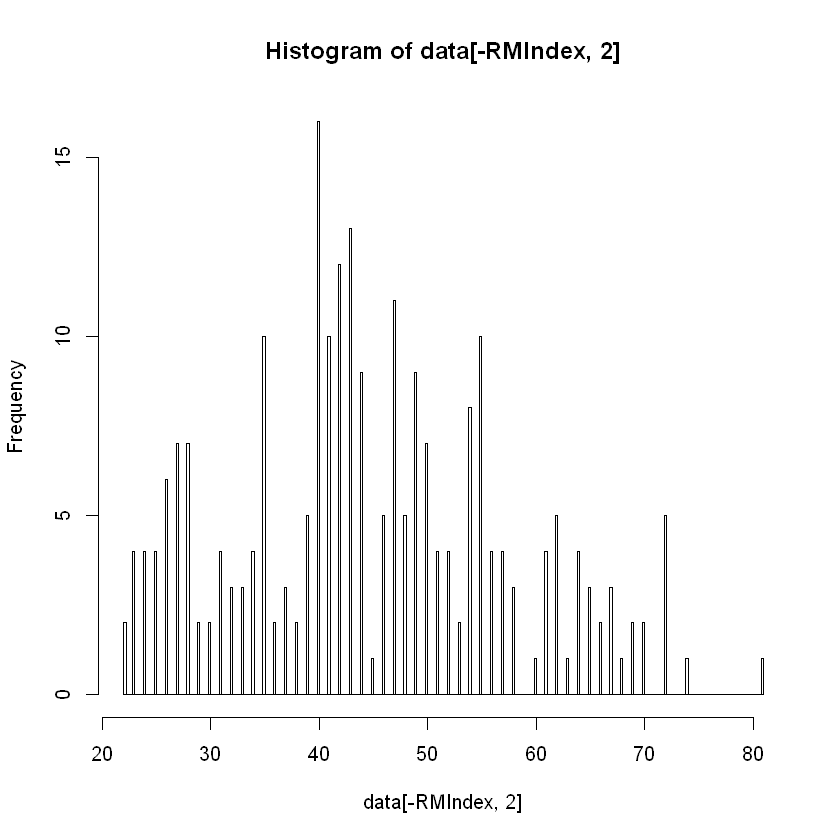

In [68]:
hist(data[-RMIndex, 2], breaks = 246)

In [83]:
14*13*12/1/2/3

[1] 364

In [84]:
results = matrix(rep(0, 364*4), ncol = 4, nrow = 364)
colnames(results) = c("V1", "V2", "V3", "R^2")
k = 1
for(i in 2:13){
    s = i+1
    for(j in s:14){
        t = j+1
        for(l in t:15){
            results[k, c(1,2,3)] = colnames(data)[c(i,j,l)]
            results[k, 4] = round(summary(lm(BODYFAT~., data = data[-RMIndex,c(1,i,j,l)]))$r.squared, 3)
            k = k+1
        }
    }
}
results[results[,4]==max(results[,4]),]

V1        V2        V3       R^2 
 "WEIGHT" "ABDOMEN"   "WRIST"    "0.72"

In [86]:
lm.final = lm(BODYFAT~WEIGHT+ABDOMEN+WRIST, data[-RMIndex,])
summary(lm.final)


Call:
lm(formula = BODYFAT ~ WEIGHT + ABDOMEN + WRIST, data = data[-RMIndex, 
    ])

Residuals:
   Min     1Q Median     3Q    Max 
-8.923 -2.910 -0.401  2.994  9.270 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -24.25349    6.27568  -3.865 0.000143 ***
WEIGHT       -0.08215    0.02228  -3.687 0.000280 ***
ABDOMEN       0.87755    0.05216  16.823  < 2e-16 ***
WRIST        -1.27640    0.39988  -3.192 0.001600 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.955 on 242 degrees of freedom
Multiple R-squared:   0.72,	Adjusted R-squared:  0.7165 
F-statistic: 207.4 on 3 and 242 DF,  p-value: < 2.2e-16


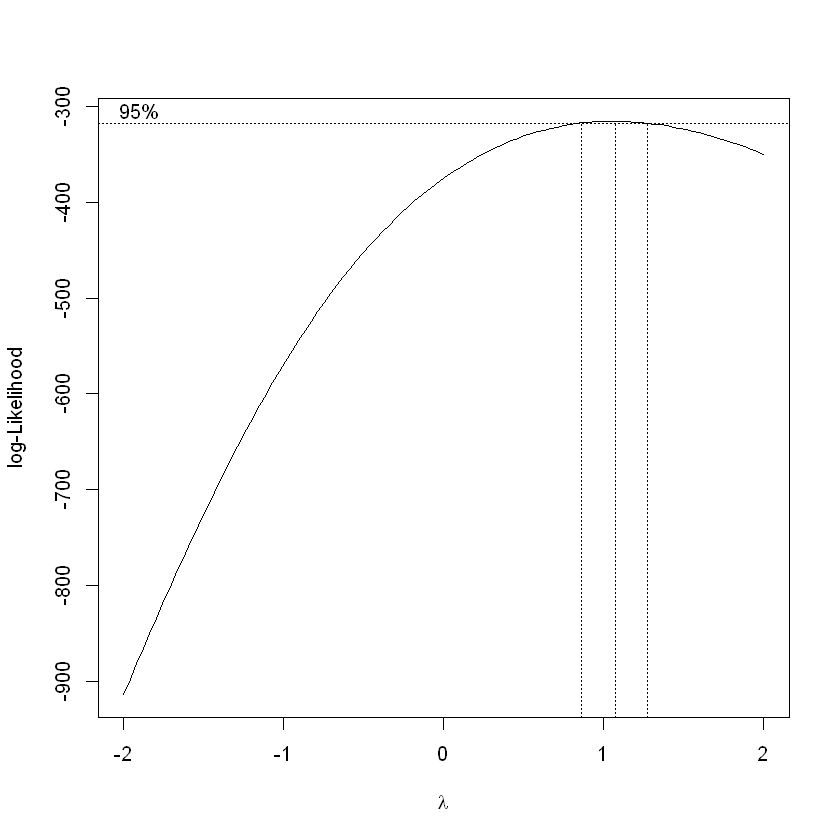

In [89]:
boxcox(lm.final)

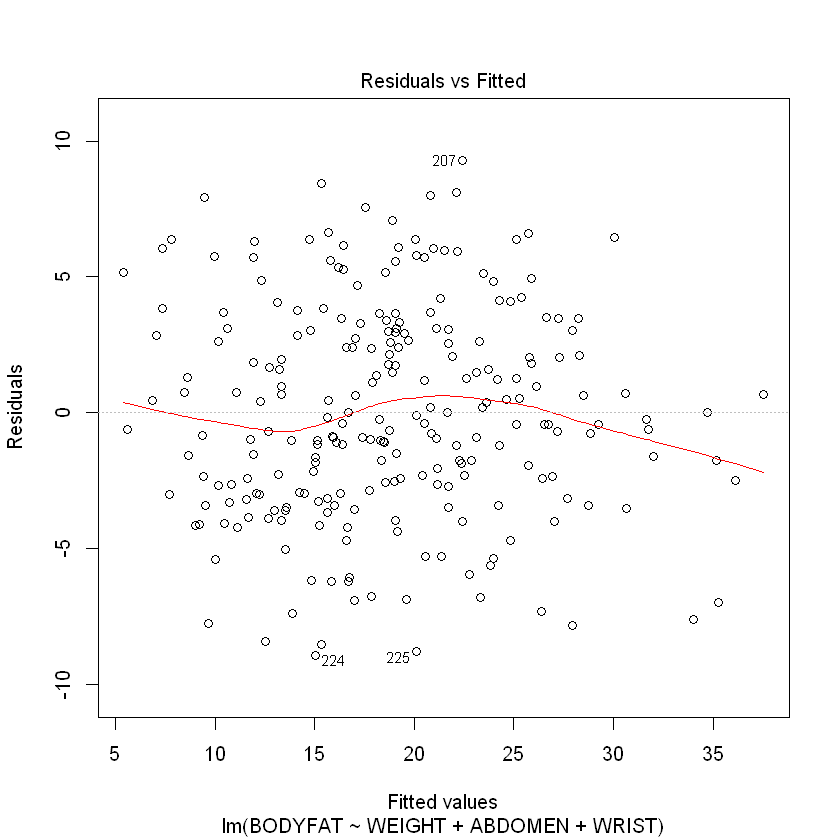

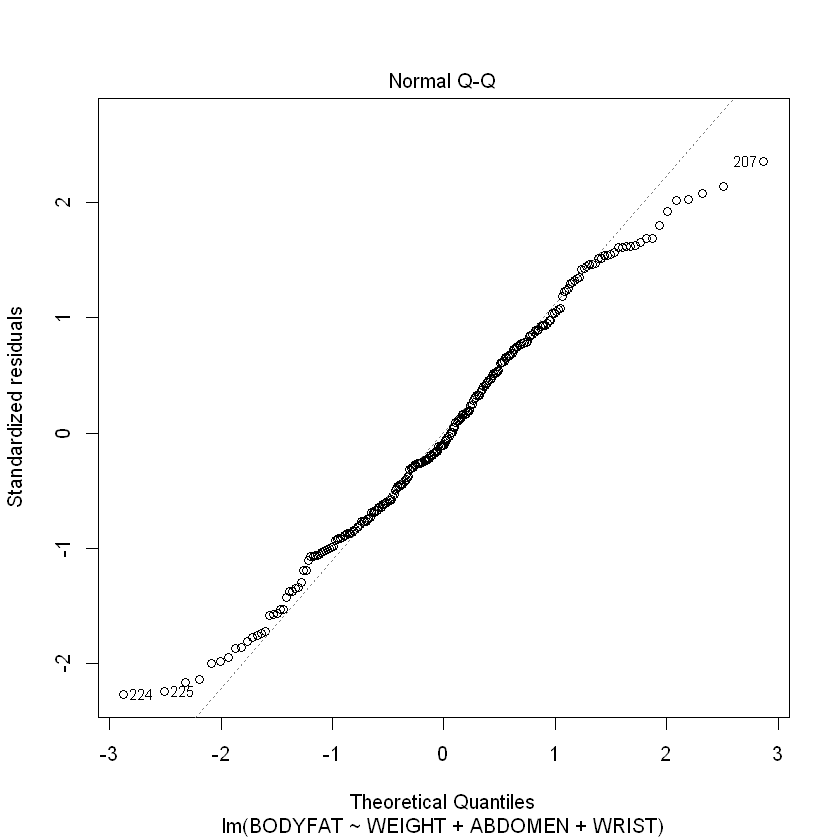

In [88]:
plot(lm.final, which = c(1,2))